In [2]:
print("######################################")
print("       Import Key Packages            ")
print("######################################")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

######################################
       Import Key Packages            
######################################


In [3]:
df_insurance = pd.read_csv(r"C:\Users\Admin\OneDrive - vnu.edu.vn\Nhập môn KHDL\insurance.csv")

In [4]:
print("############################################")
print("          Info Of the Data Set")
print("############################################")
df_insurance.info()

############################################
          Info Of the Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
import numpy as np

# Thay thế '?' bằng NaN
df_insurance.sex.replace('?', np.nan, inplace=True)

# Chuyển các giá trị phân loại 'male' và 'female' thành số (0 và 1)
df_insurance.sex = df_insurance.sex.map({'male': 1, 'female': 0})

# Điền các giá trị thiếu bằng giá trị trung bình (hoặc có thể dùng mode nếu cần)
df_insurance.sex.fillna(df_insurance.sex.mean(), inplace=True)

#  cột 'sex' là kiểu int
df_insurance.sex = df_insurance.sex.astype(int)


print("######################################################################")
print("          After Cleaning and type conversion in the Data Set")
print("######################################################################")
df_insurance.info()


######################################################################
          After Cleaning and type conversion in the Data Set
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 68.1+ KB


In [10]:
import numpy as np

# Thay thế '?' bằng NaN
df_insurance.smoker.replace('?', np.nan, inplace=True)

# Chuyển các giá trị 'yes' thành 1 và 'no' thành 0
df_insurance.smoker = df_insurance.smoker.map({'yes': 1, 'no': 0})

# Điền giá trị thiếu bằng giá trị phổ biến nhất (mode)
df_insurance.smoker.fillna(df_insurance.smoker.mode()[0], inplace=True)

# Chuyển đổi kiểu dữ liệu thành int
df_insurance.smoker = df_insurance.smoker.astype(int)


print("######################################################################")
print("          After Cleaning and type conversion in the Data Set")
print("######################################################################")
df_insurance.info()


######################################################################
          After Cleaning and type conversion in the Data Set
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 62.8+ KB


In [12]:
import numpy as np

# Chuyển cột 'region' thành kiểu chuỗi (nếu chưa phải kiểu chuỗi)
df_insurance.region = df_insurance.region.astype(str)

# Thay thế '?' bằng NaN
df_insurance.region.replace('?', np.nan, inplace=True)

# Điền giá trị thiếu bằng giá trị phổ biến nhất (mode) hoặc giá trị trung bình
df_insurance.region.fillna(df_insurance.region.mode()[0], inplace=True)

# Nếu bạn muốn chuyển các giá trị phân loại thành các giá trị số (Label Encoding)
# Chuyển đổi thành Label Encoding (số nguyên cho mỗi giá trị phân loại)
df_insurance['region'] = df_insurance['region'].astype('category').cat.codes

# In thông tin của DataFrame sau khi làm sạch
print("######################################################################")
print("          After Cleaning and type conversion in the Data Set")
print("######################################################################")
df_insurance.info()



######################################################################
          After Cleaning and type conversion in the Data Set
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int8   
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), int64(2), int8(1)
memory usage: 53.7 KB


In [14]:
display(df_insurance.describe().round(2))

,age,sex,bmi,children,smoker,region,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00,1338.00
mean,39.21,0.51,30.66,1.09,0.2,1.52,13270.42
std,14.05,0.50,6.10,1.21,0.4,1.10,12110.01
min,18.00,0.00,15.96,0.00,0.0,0.00,1121.87
25%,27.00,0.00,26.30,0.00,0.0,1.00,4740.29
50%,39.00,1.00,30.40,1.00,0.0,2.00,9382.03
75%,51.00,1.00,34.69,2.00,0.0,2.00,16639.91
max,64.00,1.00,53.13,5.00,1.0,3.00,63770.43


In [16]:
meanhp = df_insurance['sex'].mean()
df_insurance['sex'] = df_insurance['sex'].fillna(meanhp)

In [18]:
meanhp = df_insurance['smoker'].mean()
df_insurance['smoker'] = df_insurance['smoker'].fillna(meanhp)

In [20]:
meanhp = df_insurance['region'].mean()
df_insurance['region'] = df_insurance['region'].fillna(meanhp)

In [22]:
print("Skewness: %f" %df_insurance['age'].skew())
print("Kurtosis: %f" %df_insurance['age'].kurt())

Skewness: 0.055673
Kurtosis: -1.245088


In [24]:
print("Skewness: %f" %df_insurance['sex'].skew())
print("Kurtosis: %f" %df_insurance['sex'].kurt())

Skewness: -0.020951
Kurtosis: -2.002557


In [26]:
print("Skewness: %f" %df_insurance['bmi'].skew())
print("Kurtosis: %f" %df_insurance['bmi'].kurt())

Skewness: 0.284047
Kurtosis: -0.050732


In [28]:
print("Skewness: %f" %df_insurance['children'].skew())
print("Kurtosis: %f" %df_insurance['children'].kurt())

Skewness: 0.938380
Kurtosis: 0.202454


In [30]:
print("Skewness: %f" %df_insurance['smoker'].skew())
print("Kurtosis: %f" %df_insurance['smoker'].kurt())

Skewness: 1.464766
Kurtosis: 0.145756


In [32]:
print("Skewness: %f" %df_insurance['region'].skew())
print("Kurtosis: %f" %df_insurance['region'].kurt())

Skewness: -0.038101
Kurtosis: -1.327702


In [34]:
print("Skewness: %f" %df_insurance['charges'].skew())
print("Kurtosis: %f" %df_insurance['charges'].kurt())

Skewness: 1.515880
Kurtosis: 1.606299


In [36]:
df_insurance['region'] = df_insurance['region'].replace({1: 'southeast', 2: 'southwest', 3: 'northeast', 4: 'northwest'})
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,northeast,16884.92400
1,18,1,33.770,1,0,southwest,1725.55230
2,28,1,33.000,3,0,southwest,4449.46200
3,33,1,22.705,0,0,southeast,21984.47061
4,32,1,28.880,0,0,southeast,3866.85520


In [38]:
cData = pd.get_dummies(df_insurance, columns=['region'])
cData

,age,sex,bmi,children,smoker,charges,region_0,region_northeast,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,True,False,False
1,18,1,33.770,1,0,1725.55230,False,False,False,True
2,28,1,33.000,3,0,4449.46200,False,False,False,True
3,33,1,22.705,0,0,21984.47061,False,False,True,False
4,32,1,28.880,0,0,3866.85520,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,False,True,False
1334,18,0,31.920,0,0,2205.98080,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,False,False,True
1336,21,0,25.800,0,0,2007.94500,False,True,False,False


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


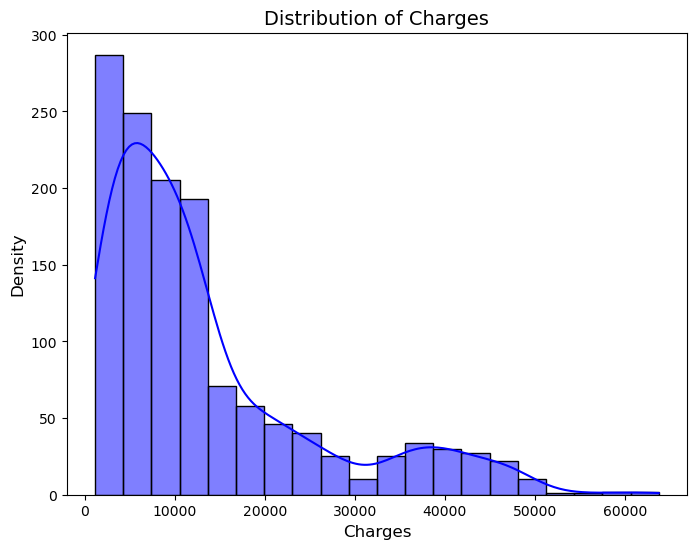

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace inf and NaN values
df_insurance["charges"] = df_insurance["charges"].replace([np.inf, -np.inf], np.nan)
df_insurance = df_insurance.dropna(subset=["charges"])

# Plot
plt.figure(figsize=(8, 6))
sns.histplot(df_insurance["charges"], kde=True, color="blue", bins=20)
plt.title("Distribution of Charges", fontsize=14)
plt.xlabel("Charges", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()




C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


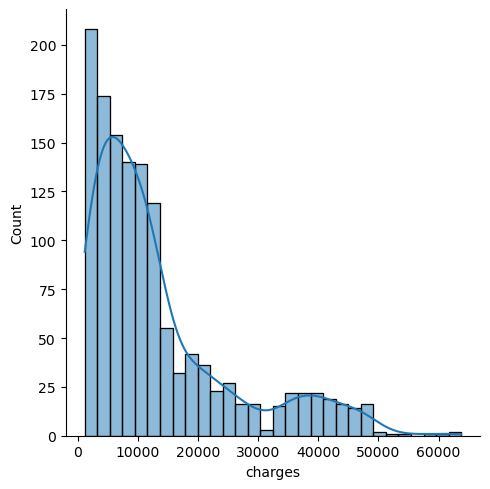

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np

# Replace infinite values with NaN explicitly in the 'charges' column
df_insurance["charges"] = df_insurance["charges"].replace([np.inf, -np.inf], np.nan)

# Optionally, fill NaN values with a placeholder value (e.g., the mean of the column) before plotting
df_insurance["charges"].fillna(df_insurance["charges"].mean(), inplace=True)

# Use displot or histplot (recommended approach)
sns_plot = sns.displot(df_insurance["charges"], kde=True)  # or sns.histplot


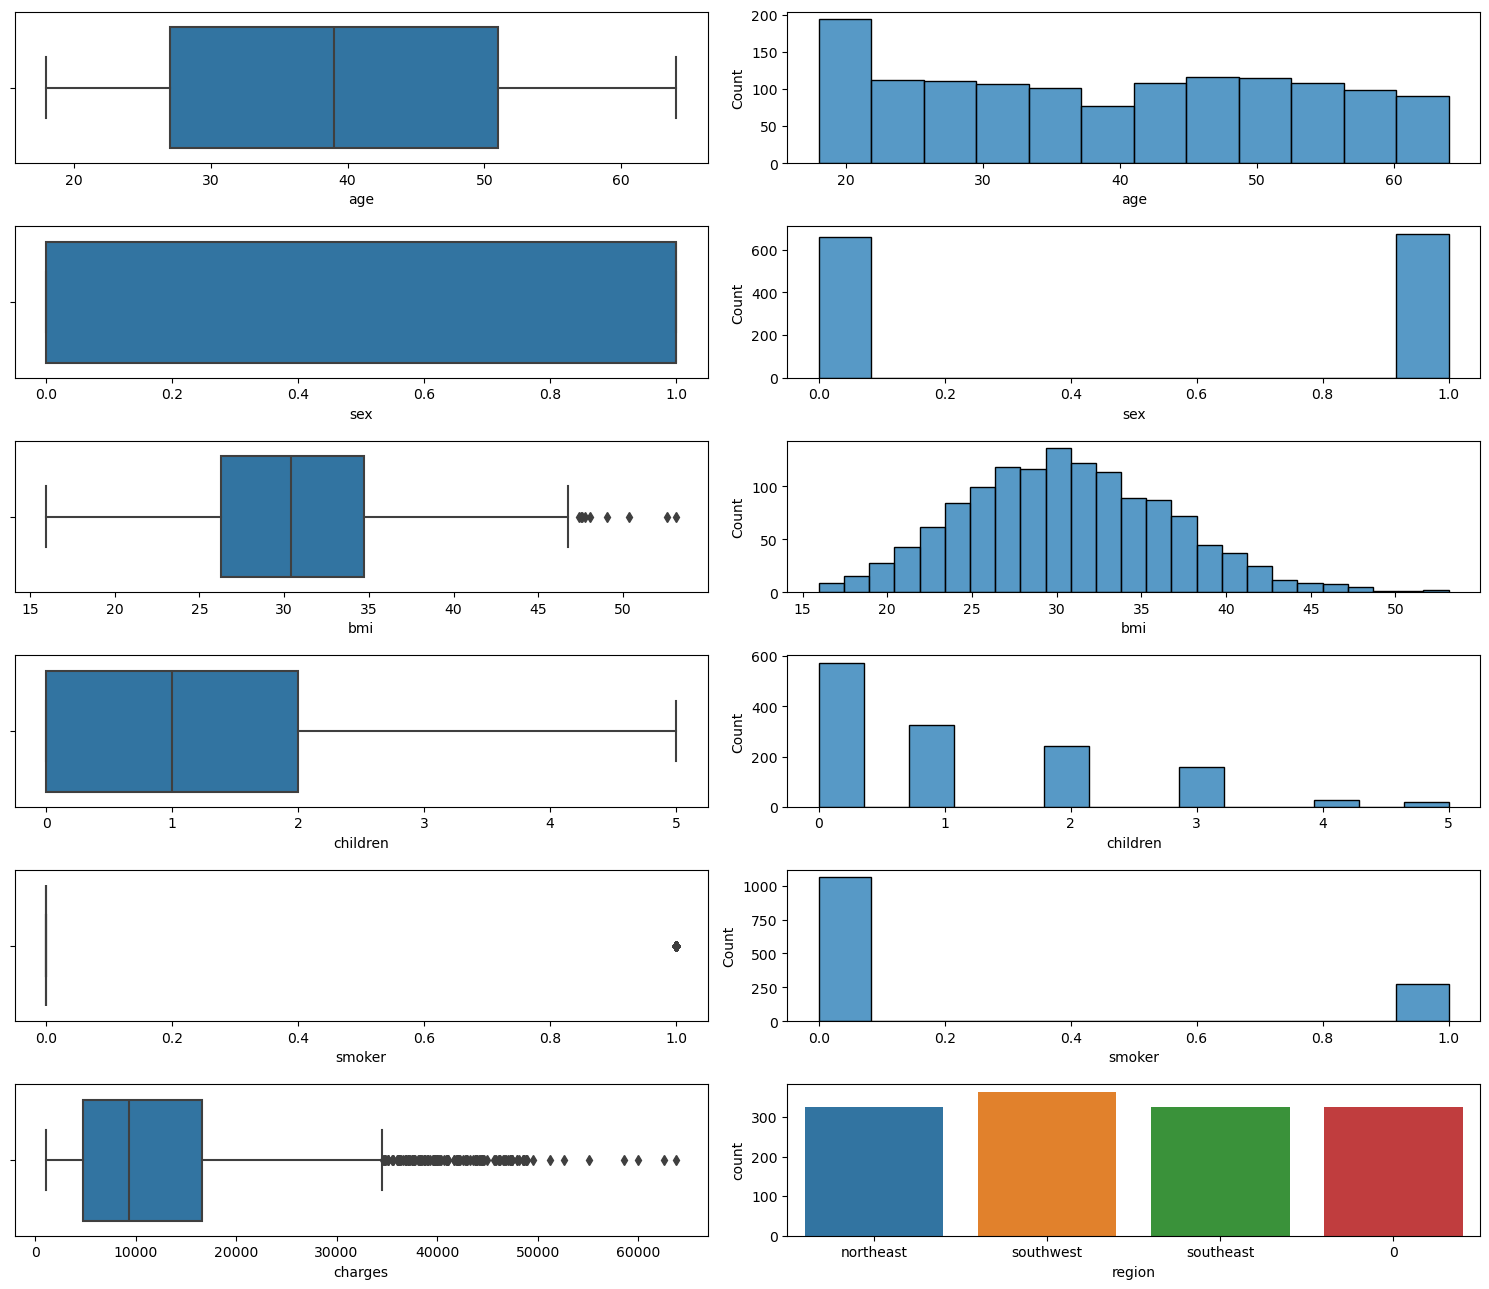

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Assuming df_insurance is your DataFrame, replace infinities with NaN
df_insurance.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plotting
fig, ax = plt.subplots(6, 2, figsize=(15, 13))

# Age
sns.boxplot(x=df_insurance["age"], ax=ax[0, 0])
sns.histplot(df_insurance['age'], ax=ax[0, 1])

# Sex
sns.boxplot(x=df_insurance["sex"], ax=ax[1, 0])
sns.histplot(df_insurance['sex'], ax=ax[1, 1])

# BMI
sns.boxplot(x=df_insurance["bmi"], ax=ax[2, 0])
sns.histplot(df_insurance['bmi'], ax=ax[2, 1])

# Children
sns.boxplot(x=df_insurance["children"], ax=ax[3, 0])
sns.histplot(df_insurance['children'], ax=ax[3, 1])

# Smoker
sns.boxplot(x=df_insurance["smoker"], ax=ax[4, 0])
sns.histplot(df_insurance['smoker'], ax=ax[4, 1])

# Charges
sns.boxplot(x=df_insurance["charges"], ax=ax[5, 0])
sns.histplot(df_insurance['charges'], ax=ax[5, 1])

# Region
sns.countplot(x=df_insurance["region"], ax=ax[5, 1])

plt.tight_layout()




<Figure size 640x480 with 0 Axes>

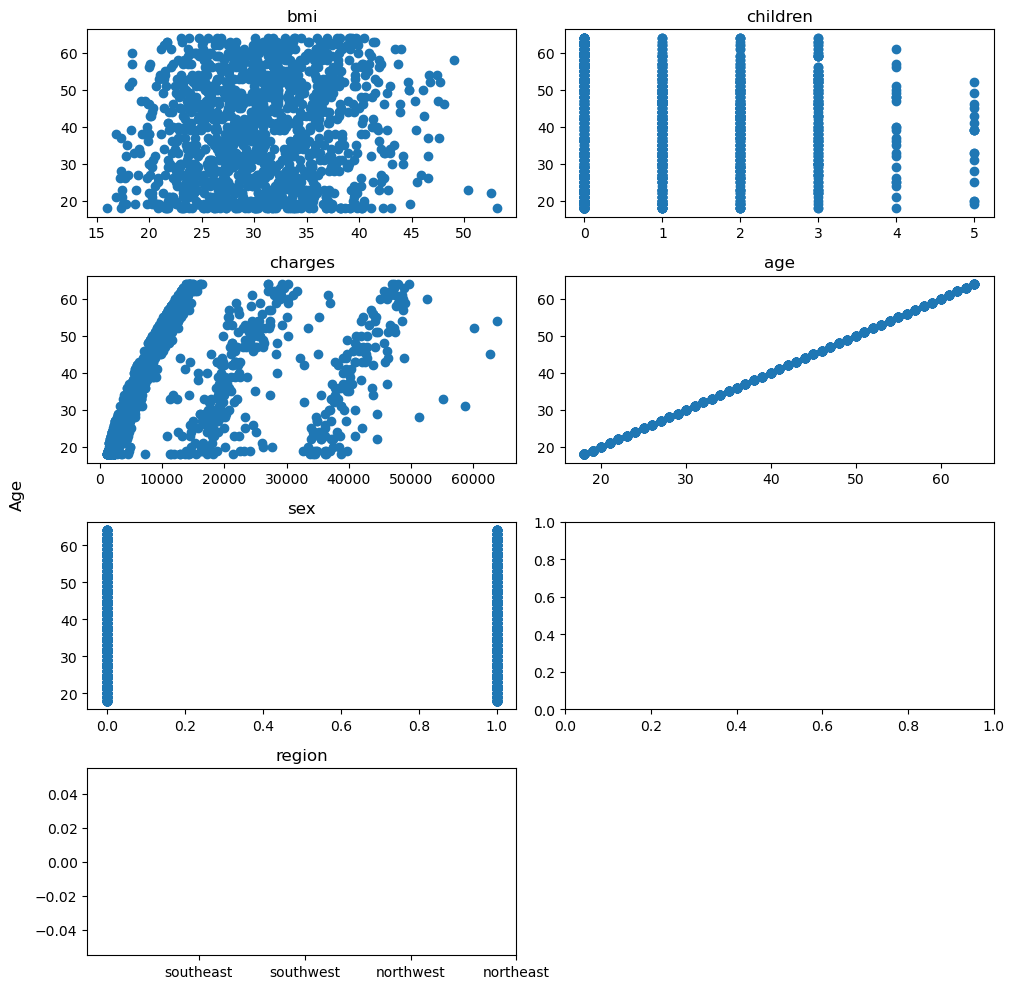

In [60]:
# Assuming df_insurance.region contains integers like 1, 2, 3 for different regions
region_map = {1: 'southeast', 2: 'southwest', 3: 'northwest', 4: 'northeast'}
df_insurance['region'] = df_insurance['region'].map(region_map)

plt.figure(1)
f, axarr = plt.subplots(4, 2, figsize=(10, 10))
ageval = df_insurance.age.values

axarr[0, 0].scatter(df_insurance.bmi.values, ageval)
axarr[0, 0].set_title('bmi')

axarr[0, 1].scatter(df_insurance.children.values, ageval)
axarr[0, 1].set_title('children')

axarr[1, 0].scatter(df_insurance.charges.values, ageval)
axarr[1, 0].set_title('charges')

axarr[1, 1].scatter(df_insurance.age.values, ageval)
axarr[1, 1].set_title('age')

axarr[2, 0].scatter(df_insurance.sex.values, ageval)
axarr[2, 0].set_title('sex')

# For region, ensure 'region' is categorical (e.g., strings)
axarr[3, 0].scatter(df_insurance.region.values, ageval)
axarr[3, 0].set_title('region')

# Rename x-axis labels to "southeast", "southwest", etc.
axarr[3, 0].set_xticks([1, 2, 3, 4])  # Adjust according to the region_map
axarr[3, 0].set_xticklabels(["southeast", "southwest", "northwest", "northeast"])

# Remove the blank plot from the subplots
axarr[3, 1].axis("off")

# Add vertical axis label
f.text(-0.01, 0.5, 'Age', va='center', rotation='vertical', fontsize=12)

plt.tight_layout()
plt.show()




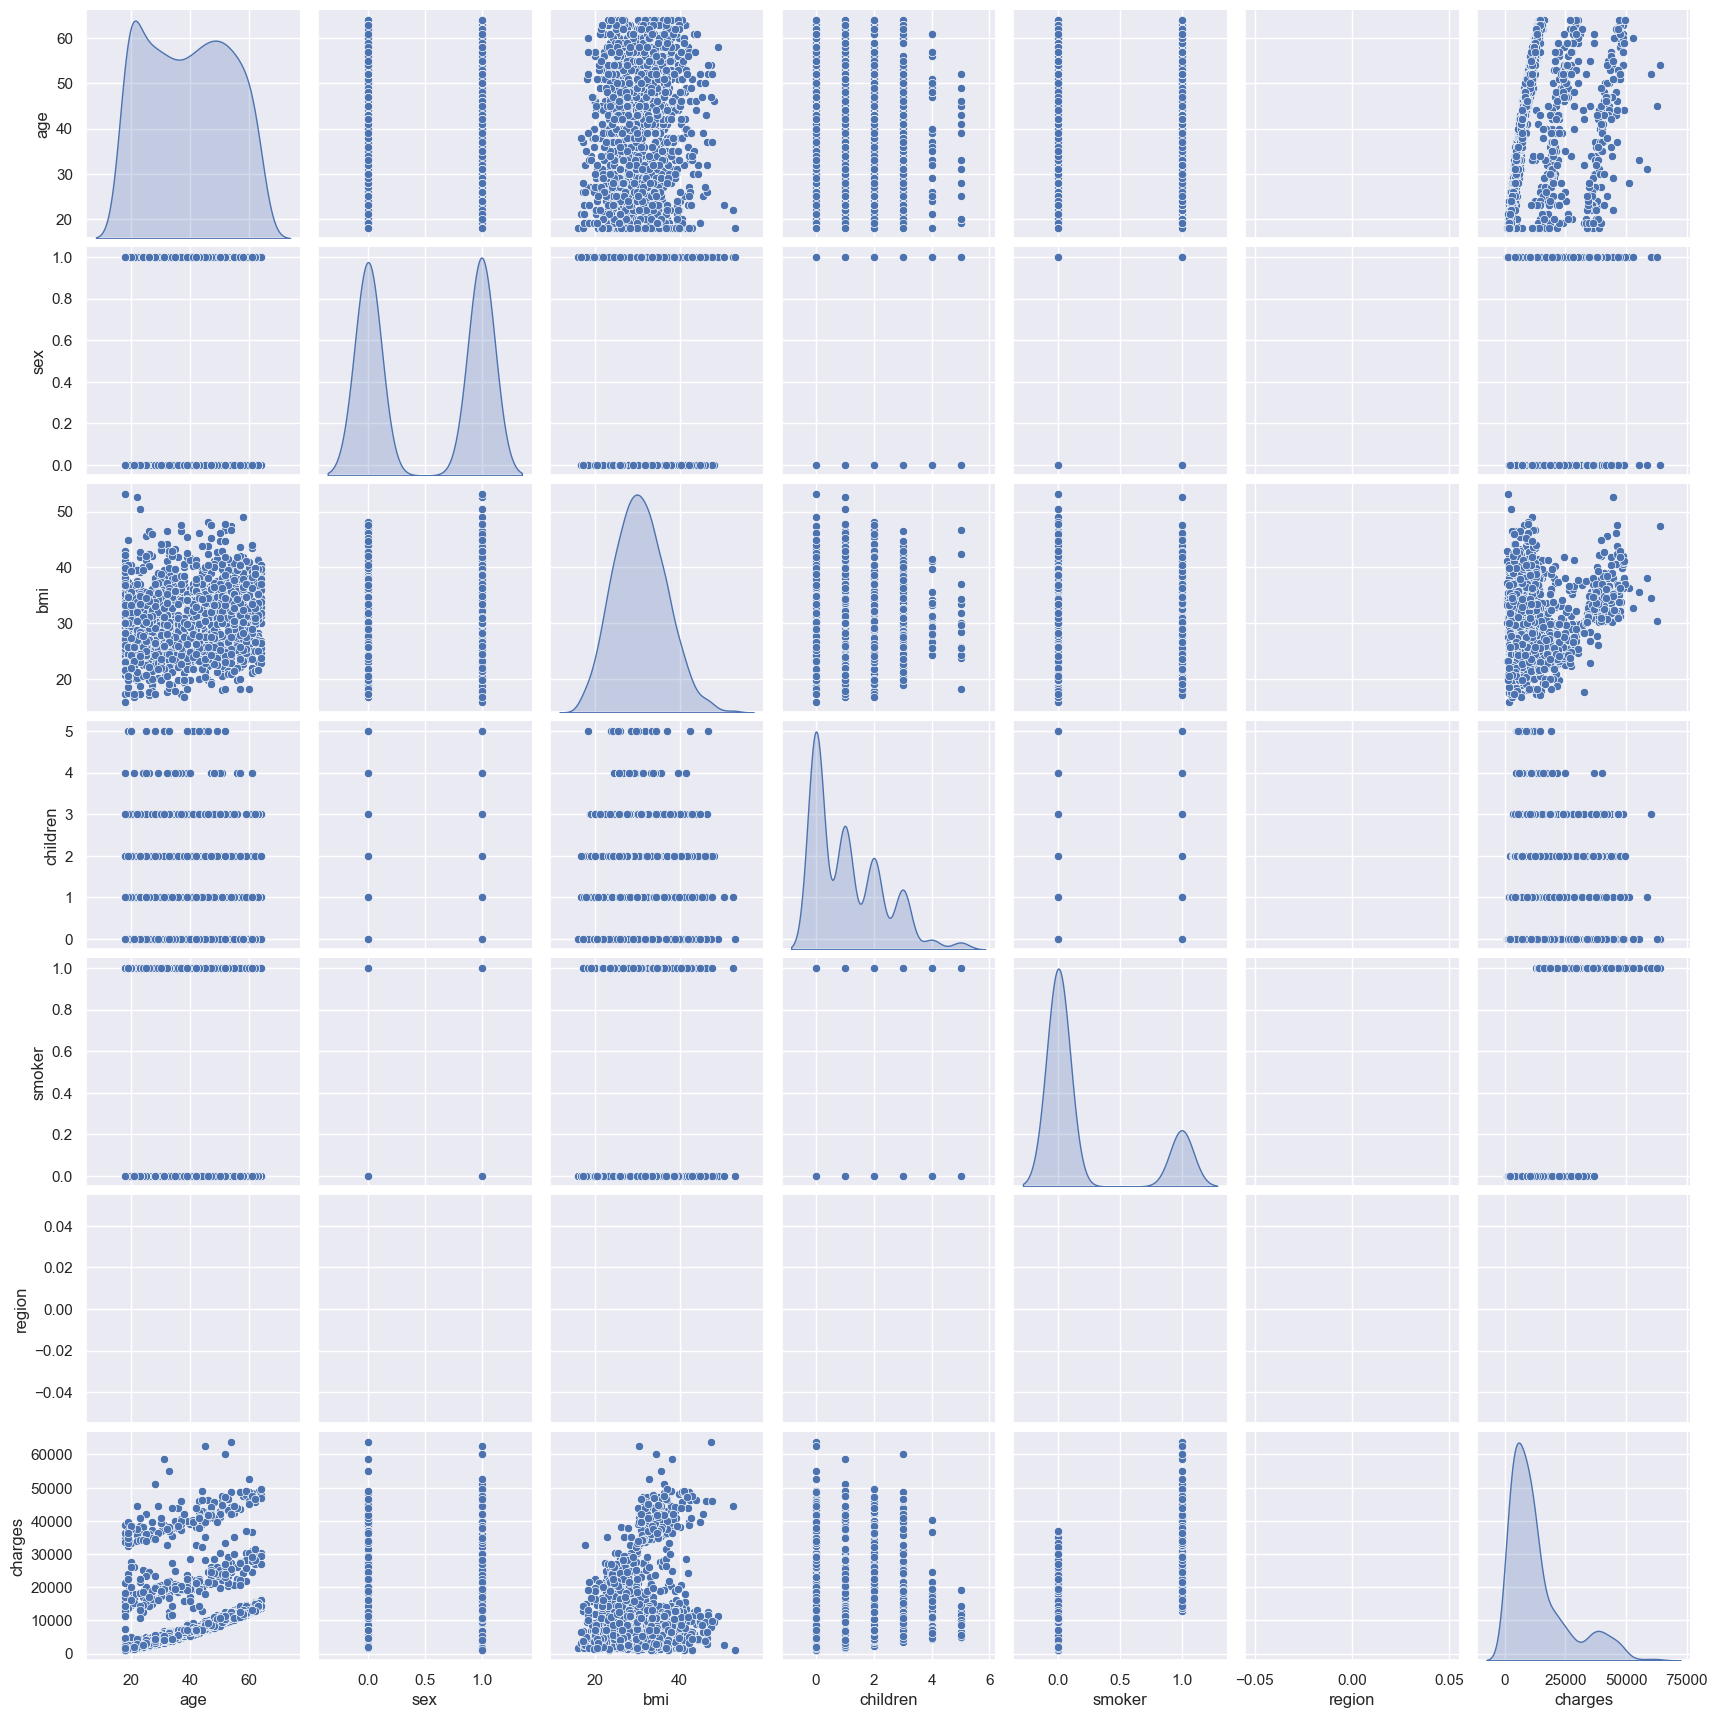

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_insurance.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')  

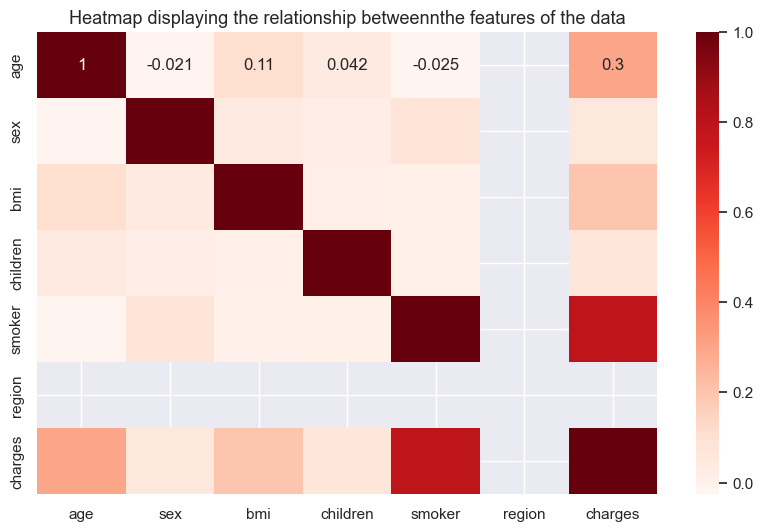

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(df_insurance.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()